## Actividad 1 ##
$\mathrm{S}_N = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def S_1(N, N_1):
    """
    Parameters
    ----------
    N : Termino a hallar
    N_1 : Termino anterior

    Returns
    ----------
    El N-esimo termino

    """
    # El n-esimo termino de la suma es igual al n-1 termino mas
    # La expresion con 2n-1 y mas la expresion con 2n, que simplificadas
    # Quedan como la suma_1 y la suma_2
    suma_1 = (1-2*N)/(2*N)
    suma_2 = 2*N/(2*N+1)
    return suma_1+suma_2+N_1


def S_2(N, N_1):
    """
    Parameters
    ----------
    N : Termino a hallar
    N_1 : Termino anterior

    Returns
    ----------
    El N-esimo termino

    """
    # Como la suma se compone de dos series, se suman por separado y luego
    # se restan, usando el resultado anterior para el n-1 esimo termino
    suma_1 = (2*N-1)/(2*N)
    suma_2 = (2*N)/(2*N+1)

    return N_1-suma_1+suma_2


def S_3(N, N_1):
    """
    Parameters
    ----------
    N : Termino a hallar
    N_1 : Termino anterior

    Returns
    ----------
    El N-esimo termino

    """
    # tercera forma de escribir la suma, considerando esta como la mas
    # efectiva debido a que no usa resta
    suma = 1/((2*N)*(2*N+1))

    return suma+N_1


Aunque en las primeras iteraciones el error relativo que se ve es 
practicamente nulo, mientras más son, el error comienza a aumentar
y aunque sea del orden de 1e-13, para los calculos computacionales 
puede afectar


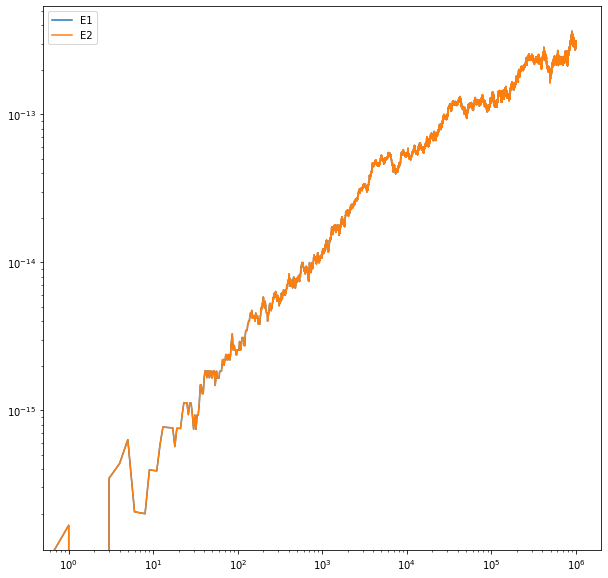

In [ ]:
def dif_sumatorias(Cantidad):
    Cantidad = int(Cantidad)
    fig, ax = plt.subplots(figsize = (10,10))
    """
    Parameters
    ----------
    Cantidad : Cantidad de iteraciones.
    
    Returns
    ----------
    Grafica del error relativo para diferentes formas de la serie
    """
    x = np.arange(0, Cantidad)
    # Definicion los primeros N
    N_1, N_2, N_3 = 0, 0, 0
    # Definicion de las listas con los n-esimos terminos
    y1, y2, y3 = np.zeros(Cantidad), np.zeros(Cantidad), np.zeros(Cantidad)
    # Creacion de las listas que contendran los E definidos en el ejercicio
    E_1, E_2 = np.zeros(Cantidad), np.zeros(Cantidad)
    for N in range(1, Cantidad):
        #Asignacion de los N-esimos valores y los valores N-1 de cada serie
        y1[N], N_1 = S_1(N, N_1), S_1(N, N_1)
        
        y2[N], N_2 = S_2(N, N_2), S_2(N, N_2)
        
        y3[N], N_3 = S_3(N, N_3), S_3(N, N_3)
        # Creacion de los E
        E_1[N] = abs((y1[N]-y3[N])/(y3[N]))
        
        E_2[N] = abs((y2[N]-y3[N])/(y3[N]))
    
    plt.loglog(x,E_1, label = "E1")
    plt.loglog(x,E_2, label = "E2")
    plt.legend()
String = """Aunque en las primeras iteraciones el error relativo que se ve es 
practicamente nulo, mientras más son, el error comienza a aumentar
y aunque sea del orden de 1e-13, para los calculos computacionales 
puede afectar"""
print(String)
dif_sumatorias(1e+06)

## Actividad 2 ##  
$X_{n+1}=rX_{n}(1-X_{n})$



In [ ]:
def T_1(r, Xn):
    """
    Parameters
    ----------
    r : Ratio de crecimiento
    Xn : Poblacion anterior

    Returns
    ----------
    Xn+1
    """
    return r*Xn*(1-Xn)


def T_2(r, Xn):
    """
    Parameters
    ----------
    r : Ratio de crecimiento
    Xn : Poblacion anterior

    Returns
    ----------
    Xn+1
    """
    return r*Xn-r*Xn**2


def T_3(r, Xn):
    """
    Parameters
    ----------
    r : Ratio de crecimiento
    Xn : Poblacion anterior

    Returns
    ----------
    Xn+1
    """
    return Xn*(r-r*Xn)


 Con un r de 3.9. Aunque en las primeras 50 iteraciones los 
valores de las 3 formas son muy similares, despues comienzan a diferir 
bastante entre ellas


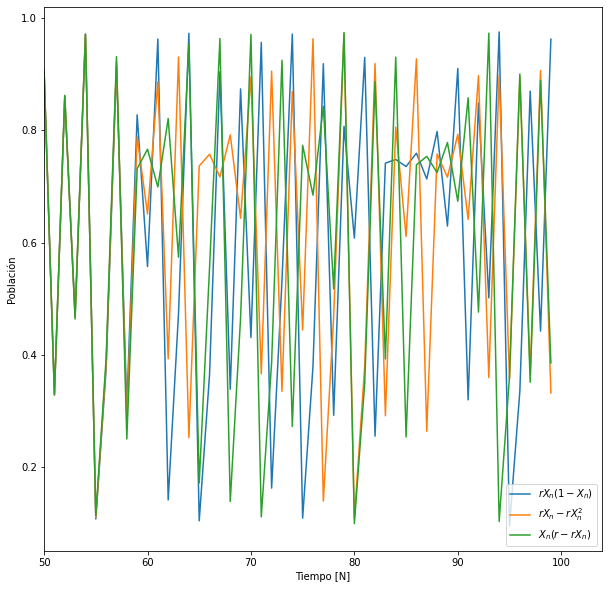

In [ ]:
def plotgrowing(N, r, Xo):
    
    fig, ax = plt.subplots(figsize = (10,10))
    """
    Parameters
    ----------
    N : Numero de repeticiones
    r : Ratio de crecimiento
    Xo :Poblacion inicial.

    Returns
    -------
    Grafico con el error relativo de las graficas
    """
    x = np.arange(0, N, 1) # Valores de las repeticiones, (tiempo)
    Xo_1, Xo_2, Xo_3 = Xo, Xo, Xo # Valores iniciales
    y1, y2, y3 = np.zeros(N), np.zeros(N), np.zeros(N)
    for i in range(N):
        # Creacion del valor en el tiempo i usando el valor en el i-1
        y1[i] = T_1(r, Xo_1)
        Xo_1 = y1[i] 
        y2[i] = T_2(r, Xo_2)
        Xo_2 = y2[i]
        y3[i] = T_3(r, Xo_3)
        Xo_3 = y3[i]
    # Configuración del grafico
    plt.plot(x, y1, label = "$rX_{n}(1-X_{n})$")
    plt.plot(x, y2, label = "$rX_{n}-rX_{n}^{2}$")
    plt.plot(x, y3, label = "$X_{n}(r-rX_{n})$")
    ax.set_xlim(50)
    ax.set_xlabel("Tiempo [N]")
    ax.set_ylabel("Población")
    ax.legend()
    
String = """ Con un r de 3.9. Aunque en las primeras 50 iteraciones los 
valores de las 3 formas son muy similares, despues comienzan a diferir 
bastante entre ellas"""

plotgrowing(100,3.9,0.8)
print(String)